In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

%matplotlib inline

In [118]:
"""
    Define market with linear demand.
    Market is characterized by demand function, which is characterized by A and b
    Right now we assume a simplt to player market.
"""
n = 2
A = np.matrix('-3 -2; -1, -3')
B = np.matrix('6;6')

In [162]:
"""
    Describes the evolition of the system.
    Here x1 and barx2 evolve by only looking at indiviudal profits
    dx2 evolves to maximize difference between sidepayment and losses.
    beta evolves to with the loose assumption that deltax2 is at opitmum,
        which allows for a single expression for (d dx2/d beta)
    Vector order [x1, barx2, dx2, beta]
"""
def dynamics( x, t ):
    x = np.matrix(x).T
    J = np.matrix('-6 -2 0 0; -1 -6 0 0')
    x_dot = J*x + B

    #constant factor
    c = 20
    dx2_dot = x[3]*A[0,1]*x[0] + (2*A[1,1]*(x[1] + x[2]) + A[1,0]*x[1] + B[1] )
    dx2_opt = ( x[2]*A[0,1]*x[0] + (2*A[1,1]*x[1] + A[1,0]*x[0] + B[1]) )/(-2*A[1,1])
    #dx2_opt = 1
    beta_dot = -1*(1-x[3])*((A[0,1]*x[0])**2)*dx2_opt/(2*A[1,1])
    x_dot = x_dot.reshape(2,).tolist()[0]
    x_dot.append(c*dx2_dot[0,0])
    x_dot.append(c*beta_dot[0,0])
    #x_dot[2] = 0
    #x_dot[3] = 0
    #print x_dot
    
    #check limits (though I don't think these should be necessary)
    #check that beta is between 0 and 1
    if x[3] >= 1 and x_dot[3] > 0:
        x_dot[3] = 0
    if x[3] <= 0 and x_dot[3] < 0:
        x_dot[3] = 0
    #make sure delta is not greater than x2
    #perhaps here we need to think of coeficients
    if (x[1] + x[2]) <=0 and ( x_dot[2] + x_dot[1] ) < 0:
        x_dot[2] = 0
    #print x_dot, x
    return x_dot

In [163]:
#x0 = [0,0,0,0]
x0 = [12.0/17,15.0/17,0,0]

t = np.linspace(0.0, 17, 14000)
x = odeint(dynamics, x0, t)

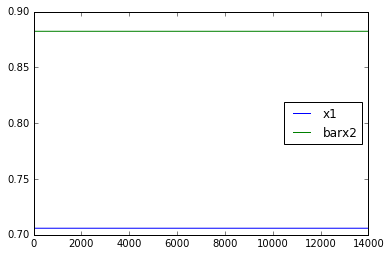

In [164]:
df = pd.DataFrame(x)
df.columns = ['x1', 'barx2', 'dx2', 'beta']
df[['x1', 'barx2']].plot()

In [165]:
df['x2'] = df['barx2'] + df['dx2']
df['p1sur'] = (df['x1']*A[0,1]*df['dx2'])
df['Pi1NC']  = df['x1']*(A[0,0]*df['x1'] + A[0,1]*df['barx2'] + B[0,0])

In [166]:
df['V1'] = df['Pi1NC'] + (1 - df['beta'])*df['p1sur']
df['V2'] = df['x2']*(A[1,0]*df['x1'] + A[1,1]*df['x2'] + B[1,0]) + df['beta']*(df['p1sur'])
df['sw'] = df['V1'] + df['V2']

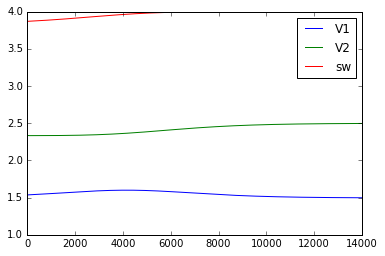

In [167]:
df[['V1', 'V2', 'sw']].plot()

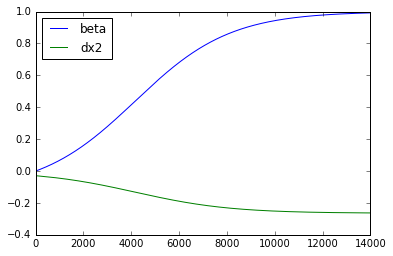

In [168]:
df[['beta', 'dx2']].plot()

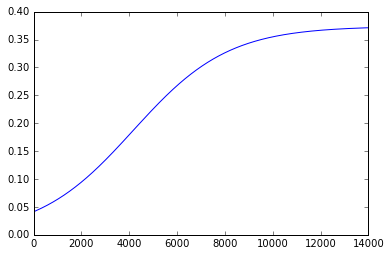

In [169]:
df['p1sur'].plot()

In [172]:
print df[['V1', 'V2', 'sw', 'p1sur', 'beta', 'dx2', 'x2', 'x1']].tail(4)

             V1        V2        sw     p1sur      beta       dx2        x2  \
13996  1.497768  2.496498  3.994266  0.371045  0.992028 -0.262824  0.619529   
13997  1.497766  2.496500  3.994266  0.371046  0.992032 -0.262825  0.619528   
13998  1.497765  2.496501  3.994266  0.371048  0.992036 -0.262826  0.619527   
13999  1.497763  2.496502  3.994266  0.371049  0.992040 -0.262826  0.619526   

             x1  
13996  0.705882  
13997  0.705882  
13998  0.705882  
13999  0.705882  


In [171]:
print 2.0/3

0.666666666667
